
# ASSIGNMENT - 4 EXPLORATORY DATA ANALYSIS ( Tokyo Olympics Players in number from different countries )
# Registration id - SIRSS2107
# Name -Mihir Vatsa

Q.1 "Perform EDA on a dataset of your choice"

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
Athletes = pd.read_excel('Athletes.xlsx')

In [5]:
Athletes

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
...,...,...,...
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing


In [6]:
Athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


In [7]:
Athletes.sample(10)

,Name,NOC,Discipline
4439,JODOIN di MARIA Sarah,Italy,Diving
2592,EGONU Paola Ogechi,Italy,Volleyball
1329,BU Tingkai,People's Republic of China,Canoe Sprint
4879,KINGMA Maya,Netherlands,Triathlon
10355,WALE Getnet,Ethiopia,Athletics
10971,ZELIKMAN Nicol,Israel,Rhythmic Gymnastics
3991,HOLASOVA Aneta,Czech Republic,Artistic Gymnastics
5112,KOWALCZUK Aleksandra,Poland,Taekwondo
6656,MORROS de ARGILA Viran,Spain,Handball
3995,HOLLAND Drew,United States of America,Water Polo


In [8]:
Athletes.isnull().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

In [9]:
Athletes.duplicated().sum()

1

In [10]:
Athletes.shape

(11085, 3)

In [11]:
Athletes.drop_duplicates(subset=None, keep='first', inplace=True)

In [12]:
Athletes['NOC'].nunique()

206

In [20]:
fig = px.bar(Athletes, x ="NOC", title = 'Number of Athletes from Countries')
fig.show()

In [14]:
Athletes['NOC'].value_counts()

United States of America      615
Japan                         586
Australia                     470
People's Republic of China    401
Germany                       400
                             ... 
Myanmar                         2
Mauritania                      2
Marshall Islands                2
Central African Republic        2
Andorra                         2
Name: NOC, Length: 206, dtype: int64

In [15]:
Athletes_Country = Athletes.groupby('NOC').count().reset_index()
Athletes_Country

,NOC,Name,Discipline
0,Afghanistan,5,5
1,Albania,8,8
2,Algeria,41,41
3,American Samoa,5,5
4,Andorra,2,2
...,...,...,...
201,"Virgin Islands, British",3,3
202,"Virgin Islands, US",4,4
203,Yemen,3,3
204,Zambia,29,29


In [16]:
Athletes_Country = Athletes_Country.sort_values('Discipline', ascending = False)
Athletes_Country.head(10)

,NOC,Name,Discipline
195,United States of America,615,615
94,Japan,586,586
10,Australia,470,470
144,People's Republic of China,401,401
71,Germany,400,400
67,France,377,377
33,Canada,368,368
73,Great Britain,366,366
92,Italy,356,356
174,Spain,324,324


In [17]:
Country_Top = Athletes_Country.head(30)
Country_Top

,NOC,Name,Discipline
195,United States of America,615,615
94,Japan,586,586
10,Australia,470,470
144,People's Republic of China,401,401
71,Germany,400,400
67,France,377,377
33,Canada,368,368
73,Great Britain,366,366
92,Italy,356,356
174,Spain,324,324


<Figure size 432x288 with 0 Axes>

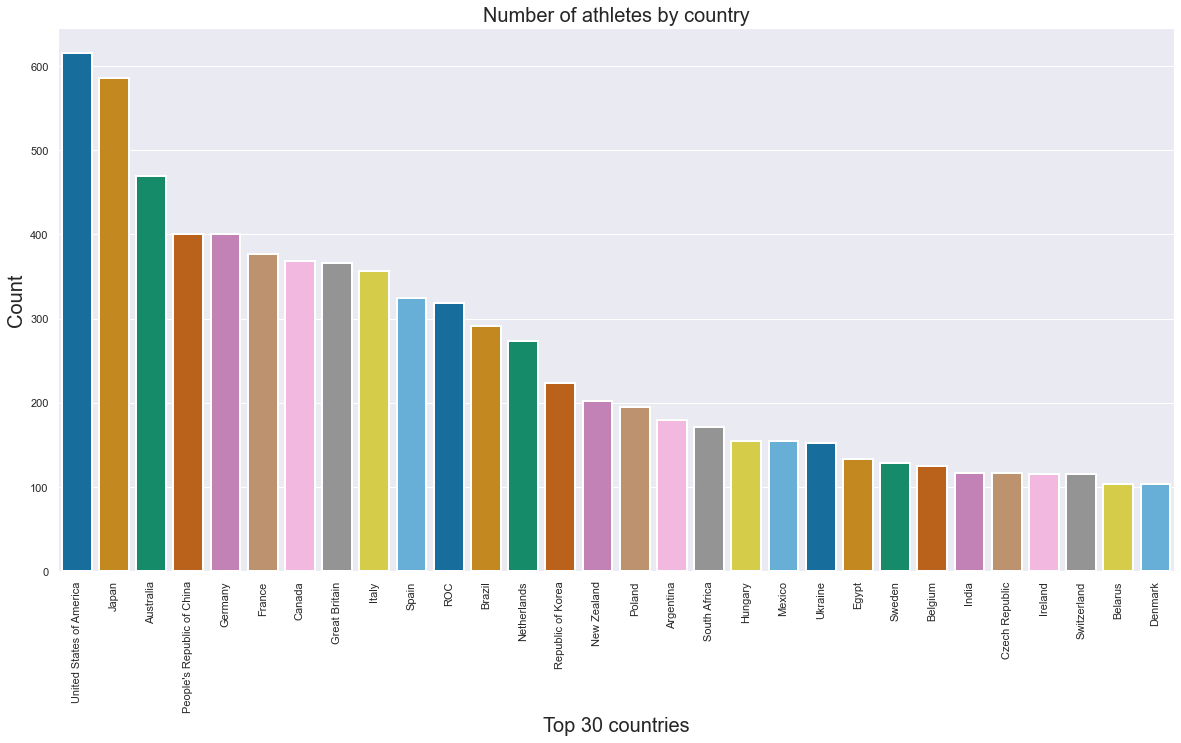

In [18]:
plt.figure()
sns.set(rc = None)
plt.figure(figsize=(20,10))
sns.barplot(x=Country_Top['NOC'], 
            y=Country_Top['Discipline'], 
            linewidth = 2,
            palette = sns.color_palette("colorblind", 
            n_colors=30))
plt.xticks(rotation = 90)
plt.xlabel('Top 30 countries', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Number of athletes by country', fontsize = 20)
plt.show()